# Probabilistic Machine Learning - Project Report

**Course:** Probabilistic Machine Learning (SoSe 2025) <br>
**Lecturer:** Dr Alvaro Diaz-Ruelas <br>
**Student(s) Name(s):** Lukas Becker <br>
**GitHub Username(s):**  lbegit <br>
**Date:**  15052025 <br>
**PROJECT-ID:** 15-2BLXXXX_epa_census <br>

---

## 1 Introduction

In recent years, transportation equity and sustainability have become central concerns in urban planning and policy. Among the key indicators of social and infrastructural access is household vehicle ownership, particularly the percentage of households without access or need to a private vehicle. These zero-vehicle households are often more dependent on public transit and walkable environments, and their distribution is shaped by a complex mix of socio-economic, spatial, and infrastructural variables.

This research aims to predict the percentage of car-free households in new and changed US Census Block Groups (CBGs). It is using the US EPA’s Smart Location Database (SLD), a rich source of standardized spatial and socio-economic indicators. The focus is on identifying how evolving social, economic, or political changes, such as new transit infrastructure, economic shifts, or population dynamics, can influence car ownership trends.

To model these dynamics, I will explore a range of machine learning techniques, from linear models like OLS, Lasso, and Ridge regression to more sophisticated approaches such as  <span style="color:red">x, y, z </span> and neural networks. The goal is to determine which models best capture the nuanced, multidimensional patterns influencing car ownership at the CBG level.

The analysis will be conducted using a carefully selected subset of variables from the SLD dataset, chosen for their theoretical relevance and practical predictive potential. These features span demographic composition, employment density, urban design, and transit access. All of which are thought to influence household decisions regarding car ownership.

## 2 Data Loading and Exploration

- Code to load data
- Basic exploration (plots, statistics, missing data, etc)

### Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Settings

In [4]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 1000) # Show all columns

### Preselection of Features

In [7]:
#df = pd.read_csv('/Users/z3/Documents/Studium/1. Semester/ProbML/SmartLocation/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')

In [9]:
#selected_df = df[['STATEFP','COUNTYFP','TRACTCE','BLKGRPCE','CSA','CSA_Name','CBSA','CBSA_Name','CBSA_POP','CBSA_EMP','CBSA_WRK','TotPop','HH','P_WrkAge','Pct_AO0','Workers','R_PCTLOWWAGE','TotEmp','E_PctLowWage','D1A','D1B','D1C','D2A_JPHH','D3A','D4A','D4C']].rename(columns={
#'STATEFP': 'STATE_ID','COUNTYFP': 'COUNTY_ID','TRACTCE':'Tract_ID','BLKGRPCE':'Block_Group','CSA': 'CSA','CSA_Name': 'CSA_NAME','CBSA': 'CBSA','CBSA_Name': 'CBSA_NAME','CBSA_POP': 'CBSA_POP','CBSA_EMP': 'CBSA_EMP','CBSA_WRK': 'CBSA_WRK','TotPop': 'TOTAL_POPULATION','HH': 'HOUSEHOLDS','P_WrkAge': 'P_WORKING_AGE','Pct_AO0': 'P_ZERO_CARS_HOUSEHOLDS','Workers': 'WORKERS','R_PCTLOWWAGE': 'P_LOW_WAGE_WORKERS','TotEmp': 'TOTAL_EMPLOYMENT','E_PctLowWage': 'P_LOW_WAGE_EMPLOYMENT','D1A': 'HOUSEHOLD_P_ACRE','D1B': 'POPULATION_P_ACRE','D1C': 'JOBS_P_ACRE', 'D2A_JPHH' : 'JOBS_P_HOUSEHOLD','D3A': 'ROAD_NETWORK_MILES','D4A': 'METERS_NEXT_TRANSIT_STOP','D4C': 'TIMES_P_HOUR_TRANSIT_SERVICE'})


In [11]:
#selected_df.tob_csv('census_data', index=False) 

#### Feature Description 

| **Column Name**                | **Original Name** | **Description**                                         | **Important for Prediction?** | **Relevance to Car Ownership**                                                              |
| ------------------------------ | ----------------- | ------------------------------------------------------- | ----------------------------- | ------------------------------------------------------------------------------------------- |
| `STATE_ID`                     | `STATEFP`         | State FIPS                                              | No                            | Record identifier |
| `COUNTY_ID`                    | `COUNTYFP`        | County FIPS                                             | No                            | Record identifier |
| `Tract_ID`                     | `TRACTCE`         | Census Tract identifier                                | No                            | Record identifier |
| `Block_Group`                  | `BLKGRPCE`        | Census Block Group code                                | No                            | Record identifier |
| `CSA`                          | `CSA`             | Combined Statistical Area code                         | No                            | Record identifier |
| `CSA_NAME`                     | `CSA_Name`        | Name of the CSA                                        | No                            | Record identifier |
| `CBSA`                         | `CBSA`            | Core-Based Statistical Area code                       | No                            | Record identifier |
| `CBSA_NAME`                    | `CBSA_Name`       | Name of the CBSA                                       | No                            | Record identifier |
| `CBSA_POP`                     | `CBSA_POP`        | Total population in the CBSA                           | Yes                           | Indicates scale of urbanization, which affects transit and car dependency                  |
| `CBSA_EMP`                     | `CBSA_EMP`        | Total employment in CBSA                               | Yes                           | Economic size often correlates with public transportation investment and job accessibility |
| `CBSA_WRK`                     | `CBSA_WRK`        | Workers living in the CBSA                             | Yes                           | Reflects commuting patterns and urban form                                                 |
| `TOTAL_POPULATION`             | `TotPop`          | Total population of the CBG                            | Yes                           | More people can imply denser neighborhoods with better transit                             |
| `HOUSEHOLDS`                   | `HH`              | Number of occupied households                          | Yes                           | Base unit for computing car ownership and household ratios                                 |
| `P_WORKING_AGE`                | `P_WrkAge`        | Percent of population aged 18–64                       | Yes                           | Working-age population drives demand for work-related travel                               |
| `P_ZERO_CARS_HOUSEHOLDS`       | `Pct_AO0`         | Percent of households with zero cars                   | **Target**                    | **This is the variable being predicted**                                                   |
| `WORKERS`                      | `Workers`         | Count of workers living in CBG                         | Yes                           | High numbers of workers may increase car ownership unless transit is strong                |
| `P_LOW_WAGE_WORKERS`           | `R_PCTLOWWAGE`    | Share of workers earning ≤\$1,250/month                | Yes                           | Low-income households are more likely to be car-free                                       |
| `TOTAL_EMPLOYMENT`             | `TotEmp`          | Number of jobs located in the CBG                      | Yes                           | More nearby jobs may reduce need for car commuting                                         |
| `P_LOW_WAGE_EMPLOYMENT`        | `E_PctLowWage`    | Share of local jobs that are low wage                  | Yes                           | Indicates local affordability and types of employment accessible without a car             |
| `HOUSEHOLD_P_ACRE`             | `D1A`             | Residential density (HHs per acre of unprotected land) | Yes                           | Denser housing often supports transit and walking                                          |
| `POPULATION_P_ACRE`            | `D1B`             | Population density per acre                            | Yes                           | Key factor in predicting transit viability and car ownership                               |
| `JOBS_P_ACRE`                  | `D1C`             | Job density per acre                                   | Yes                           | Dense employment centers reduce reliance on personal vehicles                              |
| `JOBS_P_HOUSEHOLD`             | `D2A_JPHH`        | Ratio of jobs to households                            | Yes                           | Indicates job-housing balance, affecting travel needs                                      |
| `ROAD_NETWORK_MILES`      | `D3A`           | Miles roads per square mile           | Yes                           | Roads are mostly car-oriented infrastructure and often correlate with higher car ownership                |
| `METERS_NEXT_TRANSIT_STOP`     | `D4A`             | Distance to nearest transit stop (meters)              | Yes                           | Key factor—longer distances reduce the viability of car-free living                        |
| `TIMES_P_HOUR_TRANSIT_SERVICE` | `D4C`             | Frequency of transit service near CBG during peak hour | Yes                           | More frequent service supports households not owning cars                                  |


### Load

In [14]:
# Load csv 
df_org = pd.read_csv('/Users/z3/Documents/Studium/1. Semester/ProbML/Probabilistic-Machine-Learning_lecture-PROJECTS/projects/15-2BLXXXX_epa_census/data/census_data')

In [16]:
df = df_org.copy()

### Data Preperation

#### Null-Values

In [20]:
df.isnull().sum()

STATE_ID                            0
COUNTY_ID                           0
Tract_ID                            0
Block_Group                         0
CSA                             53031
CSA_NAME                        53031
CBSA                            17095
CBSA_NAME                       17095
CBSA_POP                            0
CBSA_EMP                            0
CBSA_WRK                            0
TOTAL_POPULATION                    0
HOUSEHOLDS                        275
P_WORKING_AGE                       0
P_ZERO_CARS_HOUSEHOLDS              0
WORKERS                             0
P_LOW_WAGE_WORKERS                  0
TOTAL_EMPLOYMENT                    0
P_LOW_WAGE_EMPLOYMENT               0
HOUSEHOLD_P_ACRE                  271
POPULATION_P_ACRE                   0
JOBS_P_ACRE                         0
JOBS_P_HOUSEHOLD                    0
ROAD_NETWORK_MILES                  0
METERS_NEXT_TRANSIT_STOP            0
TIMES_P_HOUR_TRANSIT_SERVICE        0
dtype: int64

#### Missing CSA and CBSA Values
I have a lot of Null-Values in CSA and CBSA Columns. These are just additional location information and no features. I will not use them in the model. They are only useful to get information about individual elements. But they are correlated with zero values in CBSA_POP, CBSA_EMP, CBSA_WRK. These Features should and will not be used in the model. 

In [23]:
df[(df['CBSA_POP']==0) | (df['CBSA_EMP']==0) | (df['CBSA_WRK']==0)]

,STATE_ID,COUNTY_ID,Tract_ID,Block_Group,CSA,CSA_NAME,CBSA,CBSA_NAME,CBSA_POP,CBSA_EMP,CBSA_WRK,TOTAL_POPULATION,HOUSEHOLDS,P_WORKING_AGE,P_ZERO_CARS_HOUSEHOLDS,WORKERS,P_LOW_WAGE_WORKERS,TOTAL_EMPLOYMENT,P_LOW_WAGE_EMPLOYMENT,HOUSEHOLD_P_ACRE,POPULATION_P_ACRE,JOBS_P_ACRE,JOBS_P_HOUSEHOLD,ROAD_NETWORK_MILES,METERS_NEXT_TRANSIT_STOP,TIMES_P_HOUR_TRANSIT_SERVICE
78,48,421,950200,2,NaN,NaN,NaN,NaN,0,0,0,1718,585.0,0.590,0.034188,454,0.196035,611,0.170213,1.038652,2.541886,0.904012,1.044444,21.685255,-99999.0,-99999.0
301,48,331,950700,3,NaN,NaN,NaN,NaN,0,0,0,541,220.0,0.416,0.068182,402,0.233831,245,0.200000,0.250029,0.491875,0.222753,1.113636,7.396807,-99999.0,-99999.0
302,48,331,950700,4,NaN,NaN,NaN,NaN,0,0,0,861,431.0,0.696,0.081206,419,0.264916,300,0.186667,0.817271,1.453864,0.506573,0.696056,13.665453,-99999.0,-99999.0
303,48,331,950700,5,NaN,NaN,NaN,NaN,0,0,0,2513,908.0,0.526,0.000000,769,0.221066,131,0.282443,0.882287,2.441836,0.127290,0.144273,9.107649,-99999.0,-99999.0
307,48,207,950300,3,NaN,NaN,NaN,NaN,0,0,0,824,336.0,0.525,0.065476,371,0.304582,83,0.277108,0.559090,1.104773,0.111282,0.247024,11.356720,-99999.0,-99999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,78,30,961000,2,NaN,NaN,NaN,NaN,0,0,0,1471,573.0,0.000,0.000000,0,0.000000,0,0.000000,8.761019,18.813808,0.000000,0.000000,33.948142,-99999.0,-99999.0
220736,78,30,961000,3,NaN,NaN,NaN,NaN,0,0,0,940,418.0,0.000,0.000000,0,0.000000,0,0.000000,8.040306,13.008412,0.000000,0.000000,39.675163,-99999.0,-99999.0
220737,78,30,961000,5,NaN,NaN,NaN,NaN,0,0,0,878,403.0,0.000,0.000000,0,0.000000,0,0.000000,12.545333,21.941838,0.000000,0.000000,32.111446,-99999.0,-99999.0
220738,78,30,960700,3,NaN,NaN,NaN,NaN,0,0,0,1278,613.0,0.000,0.000000,0,0.000000,0,0.000000,1.404107,1.485471,0.000000,0.000000,14.657562,-99999.0,-99999.0


#### Missing Households Values

In [26]:
# Comparing households_null_values with special_territories with state identity 66 and 69

households_null_df = df[df['HOUSEHOLDS'].isnull() | df['HOUSEHOLD_P_ACRE'].isnull()]
special_territories_df = df[df['STATE_ID'].isin([66, 69])] 

same_indices = households_null_df.index.equals(special_territories_df.index)
print(same_indices)  # True if exactly same rows selected

True


The values match the total number of elements from "Northern Mariana Islands" and "Guam". Because they are missing in total and this are special territories, I will drop them. I also will drop other special territories which are not American states:

In [29]:
# Drop all special territories
df = df[df['STATE_ID']<=56] 

#### Data Description

In [32]:
df.describe()

,STATE_ID,COUNTY_ID,Tract_ID,Block_Group,CSA,CBSA,CBSA_POP,CBSA_EMP,CBSA_WRK,TOTAL_POPULATION,HOUSEHOLDS,P_WORKING_AGE,P_ZERO_CARS_HOUSEHOLDS,WORKERS,P_LOW_WAGE_WORKERS,TOTAL_EMPLOYMENT,P_LOW_WAGE_EMPLOYMENT,HOUSEHOLD_P_ACRE,POPULATION_P_ACRE,JOBS_P_ACRE,JOBS_P_HOUSEHOLD,ROAD_NETWORK_MILES,METERS_NEXT_TRANSIT_STOP,TIMES_P_HOUR_TRANSIT_SERVICE
count,217739.000000,217739.000000,217739.000000,217739.000000,165358.000000,201066.000000,2.177390e+05,2.177390e+05,2.177390e+05,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000
mean,28.032071,85.893896,260341.890681,2.222836,339.877611,30438.240379,3.640101e+06,1.706534e+06,1.657484e+06,1482.982056,549.879112,0.596186,0.092067,646.607498,0.237747,647.915008,0.295959,4.525163,10.445416,3.825622,1.793225,15.762961,-56542.004006,-53413.498352
std,15.697888,99.319321,350582.092807,1.195316,125.530744,10955.270410,5.246923e+06,2.487643e+06,2.409038e+06,990.394957,339.914770,0.102778,0.135699,416.995859,0.056450,2033.839914,0.151614,13.938563,29.280778,46.708921,38.854630,10.709707,49768.726104,49889.750594
min,1.000000,1.000000,100.000000,0.000000,104.000000,10100.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,13.000000,29.000000,10300.000000,1.000000,216.000000,19740.000000,2.058140e+05,8.365800e+04,8.366200e+04,891.000000,342.000000,0.544000,0.010289,391.000000,0.203509,73.000000,0.191916,0.295216,0.701898,0.085160,0.151659,5.605491,-99999.000000,-99999.000000
50%,28.000000,61.000000,43900.000000,2.000000,356.000000,32580.000000,1.252890e+06,5.950500e+05,5.656950e+05,1267.000000,477.000000,0.595000,0.043400,555.000000,0.232787,205.000000,0.281481,1.841697,4.318367,0.555907,0.406849,15.643013,-99999.000000,-99999.000000
75%,41.000000,109.000000,480400.000000,3.000000,428.000000,39150.000000,4.673634e+06,2.400290e+06,2.241034e+06,1818.000000,674.000000,0.649000,0.113757,797.000000,0.267123,557.000000,0.381818,4.140478,10.095174,2.200705,1.070707,23.363958,346.010000,4.670000
max,56.000000,840.000000,992201.000000,9.000000,566.000000,49820.000000,1.931847e+07,9.159786e+06,8.946175e+06,55407.000000,21337.000000,1.000000,1.000000,19255.000000,1.000000,266101.000000,1.000000,1481.257220,3133.578265,14032.760640,12325.666670,166.894521,1207.000000,973.670000


##### High Values of population

In [35]:
df[df['TOTAL_POPULATION']>30000]

,STATE_ID,COUNTY_ID,Tract_ID,Block_Group,CSA,CSA_NAME,CBSA,CBSA_NAME,CBSA_POP,CBSA_EMP,CBSA_WRK,TOTAL_POPULATION,HOUSEHOLDS,P_WORKING_AGE,P_ZERO_CARS_HOUSEHOLDS,WORKERS,P_LOW_WAGE_WORKERS,TOTAL_EMPLOYMENT,P_LOW_WAGE_EMPLOYMENT,HOUSEHOLD_P_ACRE,POPULATION_P_ACRE,JOBS_P_ACRE,JOBS_P_HOUSEHOLD,ROAD_NETWORK_MILES,METERS_NEXT_TRANSIT_STOP,TIMES_P_HOUR_TRANSIT_SERVICE
1232,48,157,672900,1,288.0,"Houston-The Woodlands, TX",26420.0,"Houston-The Woodlands-Sugar Land, TX",6779104,2975382,2886903,51536,15407.0,0.627,0.002402,18918,0.186330,3017,0.421279,1.374236,4.410976,0.258226,0.195820,14.486178,-99999.00,-99999.00
14654,48,157,673101,1,288.0,"Houston-The Woodlands, TX",26420.0,"Houston-The Woodlands-Sugar Land, TX",6779104,2975382,2886903,55407,15298.0,0.561,0.010132,14430,0.152460,17541,0.202839,1.742049,6.051140,1.915697,1.146620,18.092143,-99999.00,-99999.00
41412,6,73,18700,1,NaN,NaN,41740.0,"San Diego-Chula Vista-Carlsbad, CA",3302833,1403191,1419381,38932,6877.0,0.748,0.000000,6608,0.236229,1848,0.174242,0.057605,0.293930,0.013952,0.268722,2.366354,-99999.00,12.00
63625,12,119,911200,1,422.0,"Orlando-Lakeland-Deltona, FL",45540.0,"The Villages, FL",120999,25547,23986,39919,21337.0,0.198,0.015091,5856,0.400615,5409,0.317989,2.401617,3.626500,0.491389,0.253503,16.229679,-99999.00,-99999.00
69848,12,95,16730,1,422.0,"Orlando-Lakeland-Deltona, FL",36740.0,"Orlando-Kissimmee-Sanford, FL",2450261,1262313,1135710,31938,10189.0,0.603,0.024438,14402,0.205458,2278,0.366550,1.970425,5.639018,0.402207,0.223574,11.420017,-99999.00,0.33
170662,38,17,40500,2,244.0,"Fargo-Wahpeton, ND-MN",22020.0,"Fargo, ND-MN",237003,137770,122263,39283,15893.0,0.665,0.032908,19255,0.188990,11131,0.250292,0.565242,1.300023,0.368367,0.700371,7.012611,380.88,3.00


Unusually high values of population checked; Example Element 14654 validated by https://datacommons.org/browser/geoId/481576731011

Theory: I think this high values exist because of rapid population growth.

#### Final data selection

In [39]:
feature_df = df.iloc[:, 11:]

## 3 Data Preprocessing

- Steps taken to clean or transform the data

#### Feature Engineering

##### Threshold Values for Transit Features

##### METERS_NEXT_TRANSIT_ STOP

'All CBGs with population-weighted centroids that were further than three-quarter miles (12 km) from a transit stop were assigned a value of “-99999”'

This are bad placeholders because it should be a high positive value to show that a transit stop is far away

In [45]:
#feature_df[feature_df['METERS_NEXT_TRANSIT_STOP']==-99999]

##### TIMES_P_HOUR_TRANSIT_SERVICE

'CBGs in areas that do not have transit service were assigned the value “-99999”'

This are bad placeholders because it should be a zero to show that there is 0 times per hour

In [48]:
#feature_df[feature_df['TIMES_P_HOUR_TRANSIT_SERVICE']==-99999]

In [50]:
# Replacing placeholder values with null
feature_df['METERS_NEXT_TRANSIT_STOP'] = feature_df['METERS_NEXT_TRANSIT_STOP'].replace(-99999, np.nan)
feature_df['TIMES_P_HOUR_TRANSIT_SERVICE'] = feature_df['TIMES_P_HOUR_TRANSIT_SERVICE'].replace(-99999, np.nan)

# Create new binary feature no_transit
feature_df.loc[:, 'no_transit'] = feature_df['METERS_NEXT_TRANSIT_STOP'].isna().astype(int)

# Fill Features with suiting values
feature_df.loc[:, 'METERS_NEXT_TRANSIT_STOP'] = feature_df['METERS_NEXT_TRANSIT_STOP'].fillna(2000) # max of other data is 1200
feature_df.loc[:, 'TIMES_P_HOUR_TRANSIT_SERVICE'] = feature_df['TIMES_P_HOUR_TRANSIT_SERVICE'].fillna(0) # minimum value of zero

### <span style="color:red">Question: </span> Is changing values like this legitimate?

In [53]:
feature_df.describe()

,TOTAL_POPULATION,HOUSEHOLDS,P_WORKING_AGE,P_ZERO_CARS_HOUSEHOLDS,WORKERS,P_LOW_WAGE_WORKERS,TOTAL_EMPLOYMENT,P_LOW_WAGE_EMPLOYMENT,HOUSEHOLD_P_ACRE,POPULATION_P_ACRE,JOBS_P_ACRE,JOBS_P_HOUSEHOLD,ROAD_NETWORK_MILES,METERS_NEXT_TRANSIT_STOP,TIMES_P_HOUR_TRANSIT_SERVICE,no_transit
count,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000,217739.000000
mean,1482.982056,549.879112,0.596186,0.092067,646.607498,0.237747,647.915008,0.295959,4.525163,10.445416,3.825622,1.793225,15.762961,1331.240828,6.806150,0.567390
std,990.394957,339.914770,0.102778,0.135699,416.995859,0.056450,2033.839914,0.151614,13.938563,29.280778,46.708921,38.854630,10.709707,787.794129,22.654669,0.495439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,891.000000,342.000000,0.544000,0.010289,391.000000,0.203509,73.000000,0.191916,0.295216,0.701898,0.085160,0.151659,5.605491,457.320000,0.000000,0.000000
50%,1267.000000,477.000000,0.595000,0.043400,555.000000,0.232787,205.000000,0.281481,1.841697,4.318367,0.555907,0.406849,15.643013,2000.000000,0.000000,1.000000
75%,1818.000000,674.000000,0.649000,0.113757,797.000000,0.267123,557.000000,0.381818,4.140478,10.095174,2.200705,1.070707,23.363958,2000.000000,4.670000,1.000000
max,55407.000000,21337.000000,1.000000,1.000000,19255.000000,1.000000,266101.000000,1.000000,1481.257220,3133.578265,14032.760640,12325.666670,166.894521,2000.000000,973.670000,1.000000


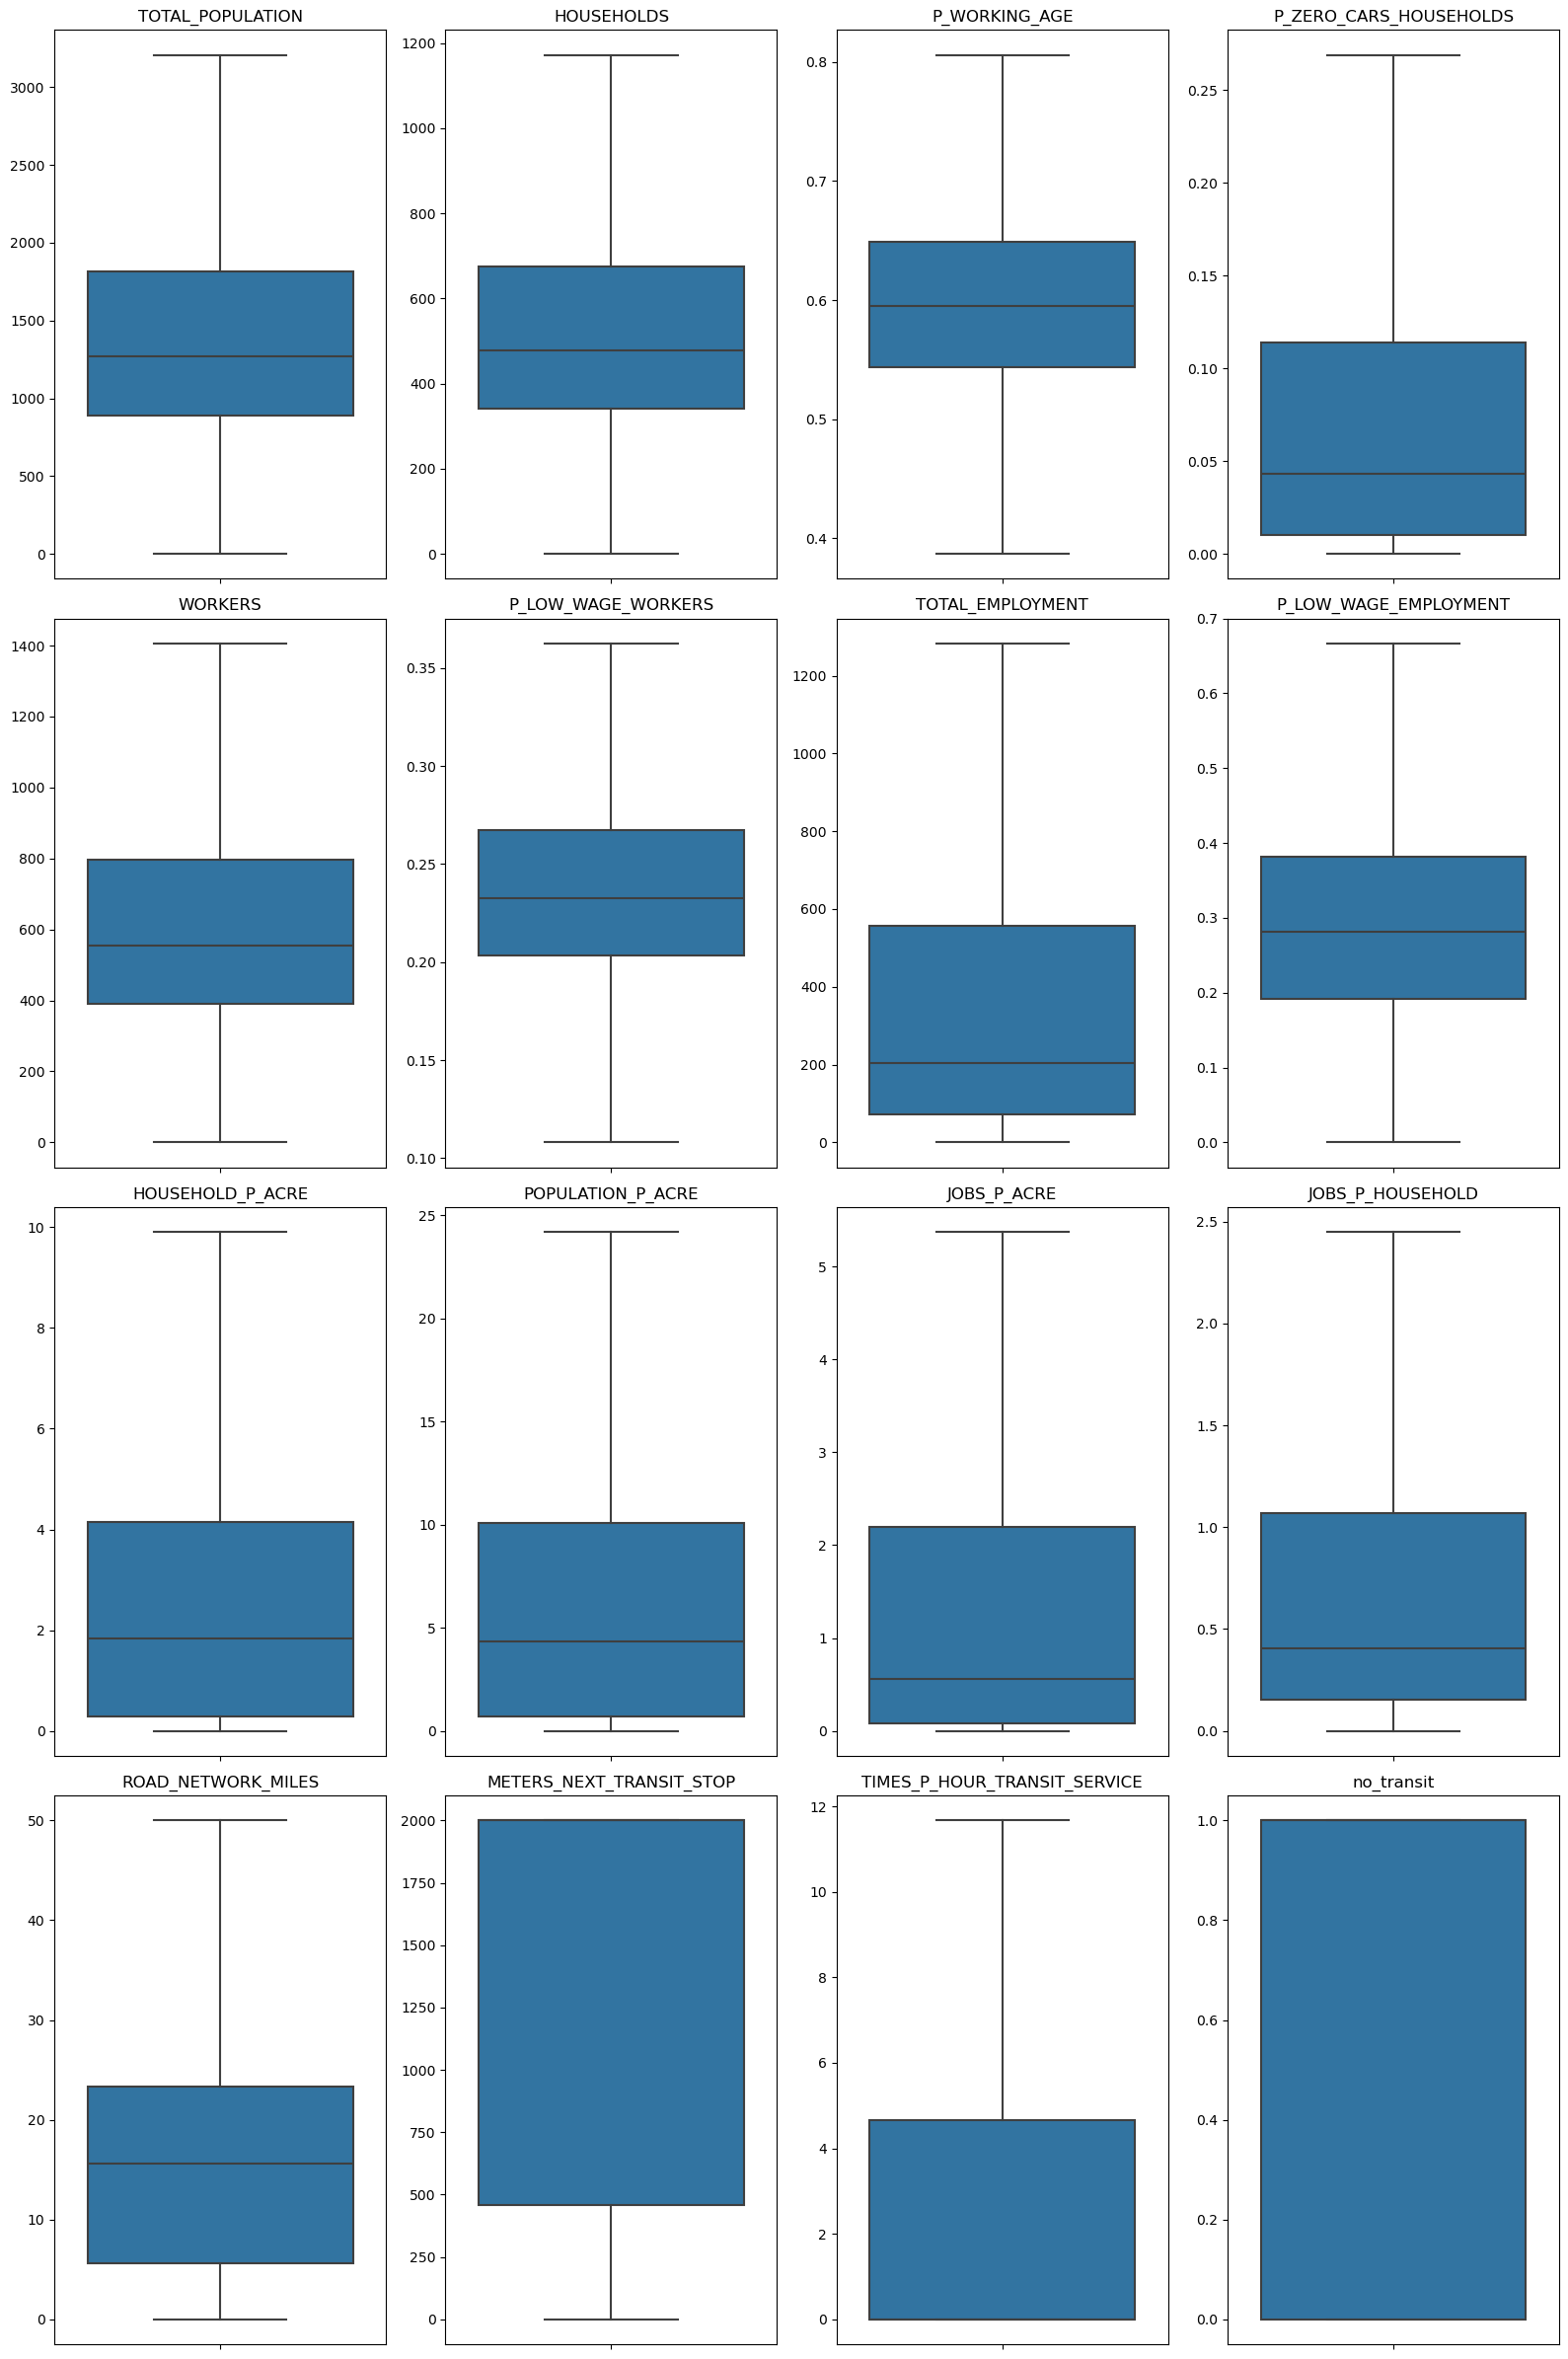

In [55]:
feature_df_numeric = feature_df.iloc[:, :]
num_cols = feature_df_numeric.shape[1]

# Create subplots: 4 rows and 4 columns
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(4 * 4, 6 * 4), sharey=False)

# Flatten the 2D axes array for easier iteration
axes = axes.flatten()

# Plot each column in its own subplot
for i, col in enumerate(feature_df_numeric.columns):
    sns.boxplot(y=feature_df_numeric[col], ax=axes[i], showfliers=False)
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide any unused subplots (in case num_cols < 16)
for j in range(num_cols, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [57]:
print((feature_df == 0).sum())

TOTAL_POPULATION                  1057
HOUSEHOLDS                        1507
P_WORKING_AGE                     1081
P_ZERO_CARS_HOUSEHOLDS           49123
WORKERS                            705
P_LOW_WAGE_WORKERS                 871
TOTAL_EMPLOYMENT                  2162
P_LOW_WAGE_EMPLOYMENT             4426
HOUSEHOLD_P_ACRE                  1455
POPULATION_P_ACRE                 1058
JOBS_P_ACRE                       2166
JOBS_P_HOUSEHOLD                  2924
ROAD_NETWORK_MILES                 586
METERS_NEXT_TRANSIT_STOP          3106
TIMES_P_HOUR_TRANSIT_SERVICE    116318
no_transit                       94196
dtype: int64


The distributions look plausible.

### <span style="color:red">Question: </span> 

### I have a lot of elements which have no_transit: 56%. Does this effect my regression in any way?

### Do I have to handle strong outliers like POPULATION_P_ACRE with max: 3133 and mean: 10?

### Correlation

In [59]:
#feature_df

In [61]:
correlation_matrix = feature_df.corr(numeric_only=True)

In [63]:
correlation_matrix.round(2)

,TOTAL_POPULATION,HOUSEHOLDS,P_WORKING_AGE,P_ZERO_CARS_HOUSEHOLDS,WORKERS,P_LOW_WAGE_WORKERS,TOTAL_EMPLOYMENT,P_LOW_WAGE_EMPLOYMENT,HOUSEHOLD_P_ACRE,POPULATION_P_ACRE,JOBS_P_ACRE,JOBS_P_HOUSEHOLD,ROAD_NETWORK_MILES,METERS_NEXT_TRANSIT_STOP,TIMES_P_HOUR_TRANSIT_SERVICE,no_transit
TOTAL_POPULATION,1.00,0.90,0.05,-0.11,0.89,-0.13,0.12,-0.01,-0.00,0.03,-0.00,-0.01,-0.08,0.07,-0.01,0.06
HOUSEHOLDS,0.90,1.00,0.07,-0.06,0.87,-0.16,0.15,-0.01,0.05,0.03,0.01,-0.03,-0.08,0.08,0.02,0.06
P_WORKING_AGE,0.05,0.07,1.00,0.09,0.11,-0.04,0.08,0.02,0.14,0.13,0.06,0.02,0.22,-0.22,0.16,-0.20
P_ZERO_CARS_HOUSEHOLDS,-0.11,-0.06,0.09,1.00,-0.13,0.19,0.06,-0.01,0.50,0.50,0.14,0.01,0.38,-0.37,0.51,-0.31
WORKERS,0.89,0.87,0.11,-0.13,1.00,-0.24,0.13,-0.01,0.00,0.01,0.00,-0.02,-0.05,0.06,0.00,0.04
P_LOW_WAGE_WORKERS,-0.13,-0.16,-0.04,0.19,-0.24,1.00,-0.05,0.13,-0.09,-0.07,-0.04,0.01,-0.02,0.04,-0.11,0.05
TOTAL_EMPLOYMENT,0.12,0.15,0.08,0.06,0.13,-0.05,1.00,-0.14,-0.01,-0.02,0.28,0.19,0.05,-0.06,0.25,-0.06
P_LOW_WAGE_EMPLOYMENT,-0.01,-0.01,0.02,-0.01,-0.01,0.13,-0.14,1.00,-0.00,0.01,-0.04,-0.03,0.09,-0.03,-0.06,-0.03
HOUSEHOLD_P_ACRE,-0.00,0.05,0.14,0.50,0.00,-0.09,-0.01,-0.00,1.00,0.89,0.16,-0.01,0.33,-0.31,0.46,-0.27
POPULATION_P_ACRE,0.03,0.03,0.13,0.50,0.01,-0.07,-0.02,0.01,0.89,1.00,0.34,-0.00,0.36,-0.34,0.44,-0.29


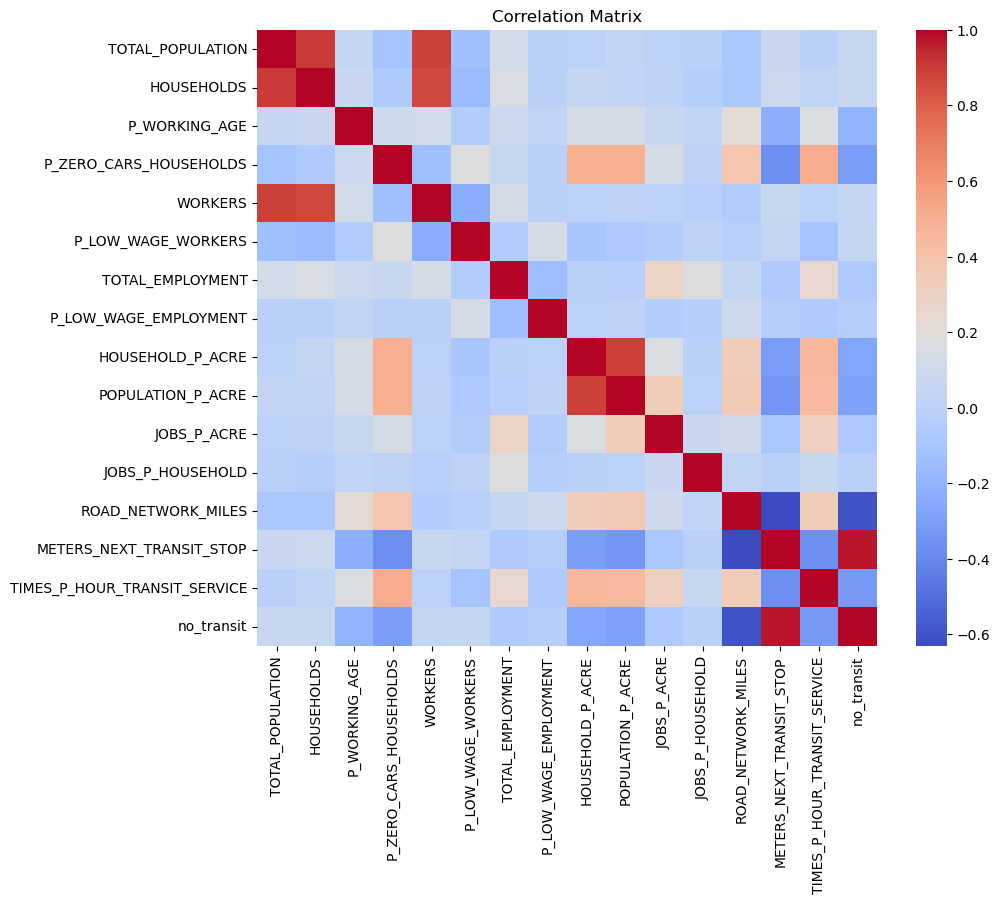

In [65]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.round(2), annot=False, cmap='coolwarm', fmt="2f")
plt.title("Correlation Matrix")
plt.show()

There are definitely some pairs of variables displaying significant correlation.

## 4 Probabilistic Modeling Approach

- Description of the models chosen
- Why they are suitable for your problem
- Mathematical formulations (if applicable)

## 5 Model Training and Evaluation

- Training process
- Model evaluation (metrics, plots, performance)
- Cross-validation or uncertainty quantification

## 6 Results

- Present key findings
- Comparison of models if multiple approaches were used

## 7 Discussion

- Interpretation of results
- Limitations of the approach
- Possible improvements or extensions

## 8 Conclusion

- Summary of main outcomes

## 9 References

- Cite any papers, datasets, or tools used